In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import numpy as np
import GPy
try:
    from google.colab import files
    uploaded = files.upload()
except ImportError:
    pass
    
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [49]:
period = np.array([1, 1, 1, 1, 1, 0, 0])
# Y = np.concatenate([period, period, period, period])#, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period, period])
# rows, _ = Y.shape
reps=6
Y=np.tile(period,reps)
data_len=len(Y)
Y=Y+np.linspace(0,len(Y)-1,data_len)
noise = np.random.normal(0,1,data_len)
Y=Y+noise
Y_noperiod=(np.linspace(0,len(Y)-1,len(Y))+noise).reshape(-1,1)
Y=Y.reshape(-1,1)
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)
#Y

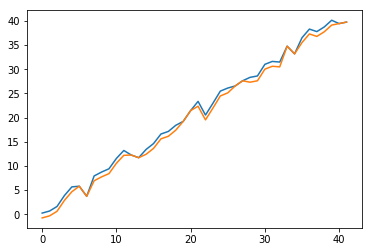

In [50]:
plt.plot(X,Y)
plt.plot(X,Y_noperiod)

### Why does adding the bias here make it predict so much better when having no noise?

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,1.8300092000634072,+ve,
sum.periodic_Matern52.lengthscale,3.412493424756903,+ve,
sum.periodic_Matern52.period,6.727931683470715,+ve,
sum.linear.variances,1.0361149017385627,+ve,
Gaussian_noise.variance,1.037862136759261,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


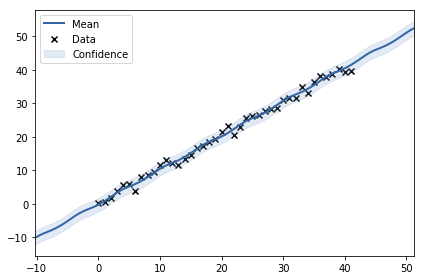

In [51]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y, MATERN+LIN)
m.optimize()
display(m)

m.plot()

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,0.6306956000106619,+ve,
sum.periodic_Matern52.lengthscale,1.292083825552183,+ve,
sum.periodic_Matern52.period,7.837750154036214,+ve,
sum.linear.variances,0.9864534745903375,+ve,
Gaussian_noise.variance,0.8391696293177335,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


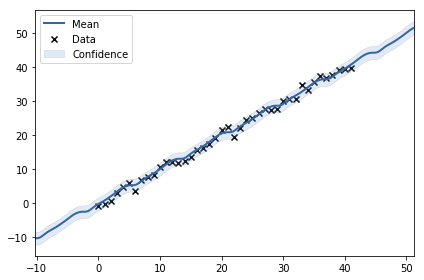

In [52]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y_noperiod, MATERN+LIN)
m.optimize()
display(m)

m.plot()